# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [3]:
data = pd.read_csv('creditcard_2023.csv')
df = pd.DataFrame(data)

## Data Visualization

In [4]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [5]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,...,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000
mean,5522.500000,0.289275,-0.379306,1.160554,-0.599833,0.296414,0.520460,0.445591,-0.156259,1.183819,...,-0.134332,-0.164478,-0.047329,0.162997,0.082168,0.107517,-0.202903,-0.096002,11964.237262,0.004346
std,3188.849871,0.603648,0.510983,0.718361,0.677674,0.648659,0.715619,0.500479,0.238518,0.918706,...,0.336047,0.564038,0.508838,1.103136,0.698946,1.227351,0.468592,0.641231,6942.553895,0.065783
min,0.000000,-2.513872,-20.936274,-1.887163,-3.996094,-4.298320,-18.642598,-3.038728,-4.074350,-2.170915,...,-5.775451,-6.238628,-14.452018,-3.674306,-6.810179,-3.733169,-5.273815,-8.758956,50.530000,0.000000
25%,2761.250000,-0.164938,-0.520236,0.696355,-0.937550,0.024293,0.106534,0.261070,-0.194486,0.581370,...,-0.214004,-0.535417,-0.198065,-0.561456,-0.332053,-0.815035,-0.330536,-0.137825,5964.330000,0.000000
50%,5522.500000,0.046835,-0.348873,1.052061,-0.515545,0.192501,0.394994,0.409261,-0.148963,1.086558,...,-0.154735,-0.167011,-0.069592,0.182683,0.126616,0.087327,-0.241289,-0.060290,11792.450000,0.000000
75%,8283.750000,0.949536,-0.157170,1.588649,-0.156584,0.407306,0.767068,0.605656,-0.088451,1.641623,...,-0.091719,0.186651,0.060336,0.863834,0.518403,0.971485,-0.102454,0.085144,18013.950000,0.000000
max,11045.000000,1.695400,1.828794,4.440555,2.240182,41.540257,9.295606,37.922674,1.315378,12.171681,...,6.830180,4.929620,18.418155,8.395836,10.424231,5.623285,17.987212,11.375357,24035.200000,1.000000


In [6]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

KeyError: 'Time'

<Figure size 1500x500 with 0 Axes>

In [7]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only {} frauds where the amount was bigger than 1000 over {} frauds'.format(str(nb_big_fraud),str(df_fraud.shape[0]) ))

There are only 48 frauds where the amount was bigger than 1000 over 48 frauds


## Unbalanced Data

In [8]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))

There are only 48  frauds in the original dataset, even though there are 10997 no frauds in the dataset.


In [9]:
print("The accuracy of the classifier then would be : {} which is the number of good classification over the number of tuple to classify".format(str((284315-492)/284315)))

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


## Correlation of the features

In [10]:
df_corr = df.corr() # Pearson, Standard Correlation Coefficient

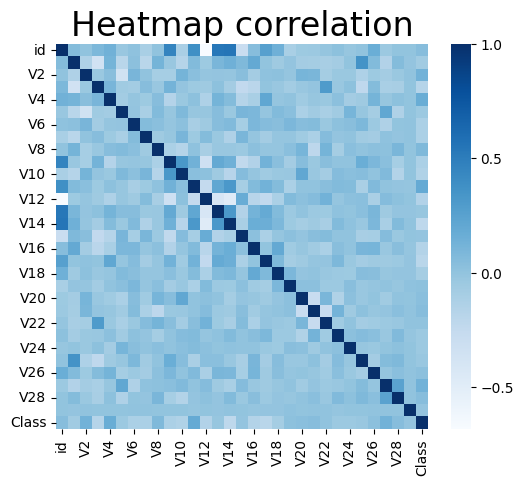

In [11]:
plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='Blues')
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

## Data Selection

### UNDERSAMPLING

In [12]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = df[0:150000] # We divide the original dataset in two parts
df_train_1 = df_train_all[df_train_all['Class'] == 1]
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have {} frauds so we need to take a similar number of non-fraud'.format(len(df_train_1)))

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds.
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 48 frauds so we need to take a similar number of non-fraud


<ipython-input-12-cc3b99d3a482>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds.


In [13]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

KeyError: "['Time'] not found in axis"

In [14]:
# with all the test dataset to see if the model learn correctly
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

KeyError: "['Time'] not found in axis"

## Fucntion for Confusion Matrix

In [15]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [16]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Applying Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
classifier = LogisticRegression()

In [23]:
classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [24]:
print(classifier.intercept_, classifier.coef_)

AttributeError: 'LogisticRegression' object has no attribute 'intercept_'

In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.954468802698145


### Confusion Matrix

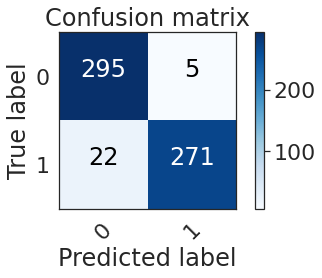

In [ ]:
cm = confusion_matrix(y_train, pred)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [ ]:
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,r2_score
report= classification_report(y_train,pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       300
           1       0.98      0.92      0.95       293

    accuracy                           0.95       593
   macro avg       0.96      0.95      0.95       593
weighted avg       0.96      0.95      0.95       593



In [ ]:
mean_abs_error = mean_absolute_error(y_train,pred)
mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))
mse= mean_squared_error(y_train,pred)
r_squared_error = r2_score(y_train,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,r_squared_error))

Mean absolute error : 0.045531197301854974 
Mean Absolute Percentage error : 0.03709949409780776
Mean Squared Error : 0.045531197301854974
R Squared Error: 0.8178498293515358


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in floor_divide
  


# Undersampling using Synthetic Minority Oversampling Technique (SMOTE) approach

In [ ]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_train,y_train= oversample.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Applying Logistic Regression

In [ ]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(classifier.intercept_, classifier.coef_)

[-3.04955805] [[ 0.09881579 -0.61843021 -0.08189188  0.98817601 -0.34140006 -0.14366433
   0.79005715 -0.78762421 -0.40296671 -0.99835478  0.58143513 -1.0343642
  -0.49650436 -1.44568553  0.01833729 -0.58885464 -0.74998263 -0.06751787
  -0.00345061 -0.14034109  0.24413152  0.51893844 -0.16940419 -0.82928158
   0.17574159 -0.36855749  0.23615798  0.65471445 -0.00394447]]


In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn after applying SMOTE: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn after applying SMOTE: 0.9583333333333334


## Confusion Matrix

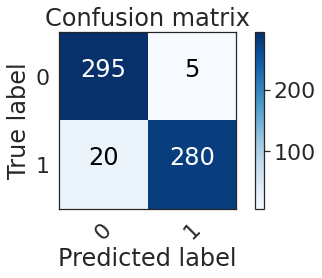

In [ ]:
cm = confusion_matrix(y_train, pred)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [ ]:
report= classification_report(y_train,pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       300
           1       0.98      0.93      0.96       300

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [ ]:
mean_abs_error = mean_absolute_error(y_train,pred)
mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))
mse= mean_squared_error(y_train,pred)
r_squared_error = r2_score(y_train,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,r_squared_error))

Mean absolute error : 0.041666666666666664 
Mean Absolute Percentage error : 0.03333333333333333
Mean Squared Error : 0.041666666666666664
R Squared Error: 0.8333333333333334


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in floor_divide
  


## Testing Error

In [ ]:
pred = classifier.predict(X_test_all)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_test_all,y_test_all)))

Accuracy from sk-learn: 0.952710170836826


### Confusion Matrix

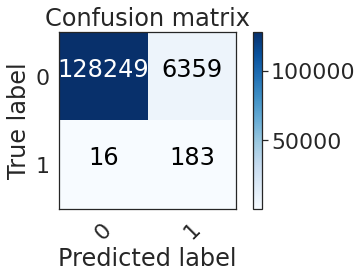

In [ ]:
cm = confusion_matrix(y_test_all, pred)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [ ]:
report= classification_report(y_test_all,pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    134608
           1       0.03      0.92      0.05       199

    accuracy                           0.95    134807
   macro avg       0.51      0.94      0.52    134807
weighted avg       1.00      0.95      0.97    134807



In [ ]:
mean_abs_error = mean_absolute_error(y_test_all,pred)
mean_abs_percentage_error = np.mean(np.abs((y_test_all - pred) // y_test_all))
mse= mean_squared_error(y_test_all,pred)
r_squared_error = r2_score(y_test_all,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,np.abs(r_squared_error)/100))

Mean absolute error : 0.04728982916317402 
Mean Absolute Percentage error : 0.0001186881986840446
Mean Squared Error : 0.04728982916317402
R Squared Error: 0.310825356202742


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in floor_divide
  


## Hyperparameter Tuning

In [ ]:
classifier_b = LogisticRegression(class_weight={0:0.6,1:0.4})

In [ ]:
classifier_b.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight={0: 0.6, 1: 0.4}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_b = classifier_b.predict(X_test_all)

In [ ]:
print(classifier_b.intercept_, classifier_b.coef_)

[-3.45739348] [[ 4.35048957e-03 -2.51664252e-01 -3.61740218e-02  8.26839368e-01
  -2.50220585e-01 -2.74290597e-01  6.15419368e-01 -6.34898774e-01
  -1.82517507e-01 -6.05270468e-01  4.67967748e-01 -7.59020169e-01
  -4.98490194e-01 -1.12792340e+00 -9.47965834e-04 -3.66086059e-01
  -4.24973567e-01 -5.02473317e-02  1.24269131e-02 -1.91698161e-01
   2.03490667e-01  3.39239798e-01 -2.17260243e-01 -7.51611739e-01
   2.98256733e-01 -2.80065468e-01  1.67962169e-01  6.57350969e-01
  -1.26442642e-03]]


In [ ]:
print ('Accuracy from sk-learn after hyperpaarameter tuning: {}'.format(classifier_b.score(X_test_all,y_test_all)))

Accuracy from sk-learn after hyperpaarameter tuning: 0.9706024167884457


### Confusion Matrix

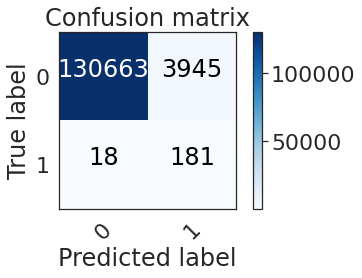

In [ ]:
cm = confusion_matrix(y_test_all, pred_b)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [ ]:
report= classification_report(y_test_all,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    134608
           1       0.04      0.91      0.08       199

    accuracy                           0.97    134807
   macro avg       0.52      0.94      0.53    134807
weighted avg       1.00      0.97      0.98    134807



In [ ]:
mean_abs_error = mean_absolute_error(y_test_all,pred_b)
mean_abs_percentage_error = np.mean(np.abs((y_test_all - pred_b) // y_test_all))
mse= mean_squared_error(y_test_all,pred_b)
r_squared_error = r2_score(y_test_all,pred_b)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,np.abs(r_squared_error)/100))

Mean absolute error : 0.029397583211554296 
Mean Absolute Percentage error : 0.00013352422351955016
Mean Squared Error : 0.029397583211554296
R Squared Error: 0.18944013907944574


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in floor_divide
  
